### Imports

In [153]:
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,8)
import nibabel as nib
from nilearn.input_data import NiftiSpheresMasker
from mpl_toolkits import mplot3d
import plotly.express as px
import pandas as pd
import os
import shutil

### Select T1w files (skip)

In [8]:
sub_dirs = os.listdir("data")
for sub_dir in sub_dirs:
    if not sub_dir.startswith('.'):
        sessions = os.listdir(f"data/{sub_dir}")
        for ses in sessions:
            if not ses.startswith('.'):
                files = os.listdir(f"data/{sub_dir}/{ses}/anat")
                for file in files:
                    if "T1w.nii" in file:
                        shutil.copyfile(f"data/{sub_dir}/{ses}/anat/{file}", f"data_T1w/{file}")

In [2]:
fmri_raw = nib.load('data/sub-561230PV/ses-1/anat/sub-561230PV_ses-1_T1w.nii.gz')
fmri_header = fmri_raw.header
print('Dataset shape: ', fmri_header.get_data_shape())
print('Voxel size (mm): ', fmri_header.get_zooms())

voxel_MRI_mat = fmri_raw.affine
print(voxel_MRI_mat)

Dataset shape:  (160, 256, 256)
Voxel size (mm):  (0.9999948, 1.0, 1.0)
[[ 9.96108055e-01 -8.09590816e-02  3.46972011e-02 -7.10480652e+01]
 [ 8.09095949e-02  9.96717393e-01  2.81830528e-03 -9.08146667e+01]
 [-3.48112918e-02 -1.23687061e-10  9.99393880e-01 -3.85276031e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


### Read summary files

In [10]:
database = pd.read_excel(
    '/Users/theo/Documents/Master_DATA/M2/signal_processing_for_ML/Project/Database.xlsx'
)
database

,SUBJID,D_INCLUSION,ID_MRI,GENRE,SEXE,DDN,AGE,NB_AN_SCOL,INFARCT_VOL T1space GK cm3,INFARCT_VOL T1space GK %,IADL_TOTAL_1_2_M6,MOCA_SCORE_J7,MOCA_SCORE_M6,MOCA_SCORE_M12,MOCA_SCORE_M36,MOCA_SCORE_M60
0,L001,26/01/2010,510702MFB,F,0,02/07/1951,58,8,0.930262,0.074427,14.0,20.0,21.0,19.0,21.0,21.0
1,L002,01/02/2010,540724JLC,M,1,24/07/1954,55,14,NaN,NaN,10.0,15.0,27.0,NaN,NaN,NaN
2,L003,04/02/2010,571216AT,M,1,16/12/1957,52,9,6.370541,0.481525,12.0,25.0,25.0,24.0,26.0,26.0
3,L004,12/02/2010,431031JPC,M,1,31/10/1943,66,8,2.587243,0.159323,13.0,21.0,NaN,21.0,NaN,NaN
4,L005,16/02/2010,260410AV,F,0,10/04/1926,83,10,12.028080,1.028757,14.0,15.0,23.0,NaN,24.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,L200,15/10/2015,370817FC,F,0,17/08/1937,78,10,1.206997,0.100800,NaN,27.0,NaN,NaN,NaN,NaN
198,L201,04/11/2015,480920EF,F,0,20/09/1948,67,11,0.171002,0.013145,14.0,29.0,30.0,3.0,30.0,NaN
199,L202,10/11/2015,510615BM,M,1,15/06/1951,64,12,6.015032,0.452634,NaN,28.0,NaN,NaN,NaN,NaN
200,L203,09/12/2015,661117OP,M,1,17/11/1966,49,11,0.557994,0.036035,14.0,30.0,28.0,26.0,28.0,NaN


In [43]:
stats_volumes_all = pd.read_csv(
    '/Users/theo/Documents/Master_DATA/M2/signal_processing_for_ML/Project/data_T1w_segmented/sclimbic_volumes_all.csv'
)
stats_volumes_all['ID_MRI'] = stats_volumes_all.case.apply(
    lambda l: re.findall('-[0-9]+[A-Z]+_', l)[0][1:-1]
)
stats_volumes_all['ses'] = stats_volumes_all.case.apply(
    lambda l: re.findall('_ses-[0-9]_', l)[0][-2]
)

In [71]:
stats_volumes_all

,case,Left-Nucleus-Accumbens,Right-Nucleus-Accumbens,Left-HypoThal-noMB,Right-HypoThal-noMB,Left-Fornix,Right-Fornix,Left-MammillaryBody,Right-MammillaryBody,Left-Basal-Forebrain,Right-Basal-Forebrain,Left-SeptalNuc,Right-SeptalNuc,ID_MRI,ses
0,sub-561230PV_ses-1_T1w,391.3531,425.0863,432.7346,447.6709,494.8329,581.6073,62.3889,66.3118,325.8430,360.5298,120.6973,122.6665,561230PV,1
1,sub-561230PV_ses-2_T1w,251.3988,270.1645,372.7118,394.6465,374.7776,335.2044,54.6505,70.3596,251.2070,291.1911,108.3337,102.6719,561230PV,2
2,sub-561230PV_ses-3_T1w,171.9109,194.6711,342.3279,356.0924,212.6338,255.5058,46.0859,61.7726,157.5004,228.8239,90.5746,86.4208,561230PV,3
3,sub-570226LD_ses-1_T1w,300.4667,318.6597,439.6470,427.5720,405.9555,362.2470,58.7780,65.1289,344.9737,373.4046,105.4529,98.2305,570226LD,1
4,sub-570226LD_ses-2_T1w,173.7346,187.0540,423.3690,424.0515,269.1703,265.5680,60.9708,65.0657,231.7649,287.4190,115.6659,98.9140,570226LD,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,sub-840909AD_ses-1_T1w,405.8038,382.3973,463.9880,458.0738,524.7967,436.2665,52.8845,55.8508,275.6154,341.4301,98.8994,100.0969,840909AD,1
111,sub-840909AD_ses-2_T1w,238.6950,247.1719,409.8737,436.8664,477.9832,384.8245,52.6565,58.4198,241.1009,296.9810,96.8124,91.1176,840909AD,2
112,sub-840909AD_ses-3_T1w,414.5515,357.0838,442.7585,499.3550,494.3750,394.3424,53.7393,54.6239,294.2897,299.6799,99.5165,98.0320,840909AD,3
113,sub-851225EM_ses-1_T1w,428.0245,398.5379,485.7228,500.7216,515.3477,520.8797,56.6751,58.5832,315.8894,331.2284,100.6950,97.7037,851225EM,1


In [121]:
new_database = database.merge(stats_volumes_all, how='inner', on='ID_MRI')
new_database.ses = new_database.ses.apply(lambda x: int(x))

In [122]:
px.histogram(new_database, x='AGE', color='GENRE')

In [130]:
new_database

,SUBJID,D_INCLUSION,ID_MRI,GENRE,SEXE,DDN,AGE,NB_AN_SCOL,INFARCT_VOL T1space GK cm3,INFARCT_VOL T1space GK %,...,Right-HypoThal-noMB,Left-Fornix,Right-Fornix,Left-MammillaryBody,Right-MammillaryBody,Left-Basal-Forebrain,Right-Basal-Forebrain,Left-SeptalNuc,Right-SeptalNuc,ses
0,L003,04/02/2010,571216AT,M,1,16/12/1957,52,9,6.370541,0.481525,...,471.5518,416.1111,573.5684,49.4852,55.6321,334.0451,341.2164,118.3672,112.9076,1
1,L003,04/02/2010,571216AT,M,1,16/12/1957,52,9,6.370541,0.481525,...,473.8978,402.4113,576.8759,43.6625,53.1986,288.8367,349.1452,108.4509,105.6130,2
2,L003,04/02/2010,571216AT,M,1,16/12/1957,52,9,6.370541,0.481525,...,388.4230,195.9639,328.9065,42.3111,53.9396,242.8908,260.1811,116.3226,95.6259,3
3,L007,25/02/2010,640425SV,F,0,25/04/1964,45,12,9.354000,0.784876,...,384.6268,418.6462,427.7448,52.7931,51.8725,255.2291,296.1764,97.2570,86.9364,1
4,L012,15/03/2010,691229DB,M,1,29/12/1969,40,10,31.404168,2.060195,...,517.8260,570.1716,412.8373,57.0824,57.4625,309.6815,357.9673,113.6432,97.9317,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,L197,25/09/2015,640107GB,M,1,07/01/1964,51,9,62.299836,3.902570,...,462.5803,511.9697,573.4288,41.9810,57.7497,304.0457,356.7096,130.4705,114.3635,2
111,L197,25/09/2015,640107GB,M,1,07/01/1964,51,9,62.299836,3.902570,...,436.4105,513.3054,554.9717,50.7349,61.3595,269.4730,325.6717,130.3613,124.4484,3
112,L203,09/12/2015,661117OP,M,1,17/11/1966,49,11,0.557994,0.036035,...,420.8193,617.8773,547.1752,57.1557,63.8007,246.9631,342.1826,134.1788,111.7049,1
113,L203,09/12/2015,661117OP,M,1,17/11/1966,49,11,0.557994,0.036035,...,426.9583,597.6527,472.7740,64.1641,66.3015,241.5047,301.7665,129.2784,104.4204,2


### Age / Disease evolution

Classify the level of disease using MOCA J7 score: 
- < 10: severe, level 3
- in [10, 17]: moderate, level 2
- in [18, 25]: mild, level 1
- in > 26: no disease, level 0

In [133]:
def level_MOCA(x):
    x = float(x)
    if x < 10:
        return 3
    elif 10 <= x < 17:
        return 2
    elif 18 <= x < 25:
        return 1
    else:
        return 0

In [138]:
new_database.loc[
    (new_database['ses']==3) &
    (new_database['level_MOCA']==0)
]

,SUBJID,D_INCLUSION,ID_MRI,GENRE,SEXE,DDN,AGE,NB_AN_SCOL,INFARCT_VOL T1space GK cm3,INFARCT_VOL T1space GK %,...,Left-Fornix,Right-Fornix,Left-MammillaryBody,Right-MammillaryBody,Left-Basal-Forebrain,Right-Basal-Forebrain,Left-SeptalNuc,Right-SeptalNuc,ses,level_MOCA
2,L003,04/02/2010,571216AT,M,1,16/12/1957,52,9,6.370541,0.481525,...,195.9639,328.9065,42.3111,53.9396,242.8908,260.1811,116.3226,95.6259,3,0
11,L027,21/06/2010,580620CG,F,0,20/06/1958,52,10,0.330001,0.025272,...,490.8115,407.1844,47.2381,50.3561,194.7772,284.9810,70.2976,75.9522,3,0
14,L033,23/09/2010,581002PR,M,1,02/10/1958,51,10,2.059000,0.144064,...,478.1561,425.1167,54.3069,57.5464,244.7523,274.5210,111.8815,98.7583,3,0
22,L067,21/06/2011,670806JPP,M,1,06/08/1967,43,10,22.688000,1.468032,...,482.7034,427.1277,45.3659,58.1001,249.7675,290.2650,115.8032,95.7083,3,0
25,L068,21/06/2011,610612HV,M,1,12/06/1961,50,12,5.656000,0.369689,...,145.0812,68.1199,42.0494,43.1524,33.9639,88.7905,97.1142,72.2260,3,0
31,L080,26/07/2011,600816JLS,M,1,16/08/1960,50,11,2.642000,0.202273,...,280.9860,305.9940,51.5519,56.2784,243.8131,222.3906,84.9432,84.4607,3,0
34,L082,02/08/2011,600506GH,M,1,06/05/1960,51,13,2.758000,0.184573,...,516.0687,390.5955,60.9486,64.4071,223.0329,289.4993,128.9227,114.9198,3,0
39,L093,09/11/2011,720501GL,M,1,01/05/1972,39,20,4.076000,0.268955,...,427.3675,358.8207,49.6042,59.4350,129.2661,195.5455,89.7698,81.1368,3,0
46,L104,27/03/2012,731001LC,M,1,01/10/1973,38,20,1.743000,0.124134,...,342.2281,254.4100,60.5701,61.6037,65.8425,156.8986,85.7487,77.7466,3,0
49,L106,29/03/2012,561230PV,M,1,30/12/1956,55,14,11.117942,0.781315,...,212.6338,255.5058,46.0859,61.7726,157.5004,228.8239,90.5746,86.4208,3,0


For healthy people, i.e level 0, focusing on ses_3:

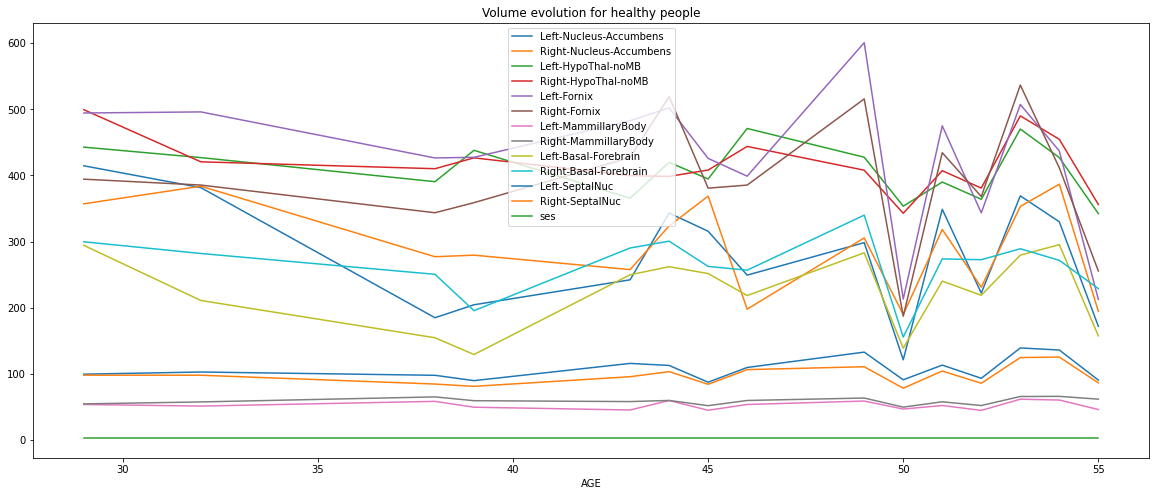

In [152]:
new_database.loc[
    (new_database['ses']==3) &
    (new_database['level_MOCA']==0)
].groupby(by=['AGE']).mean().plot(use_index=True, y=new_database.columns[17:-1])
plt.title('Volume evolution for healthy people')
plt.show()

For sick people, i.e level 0, focusing on ses_3:

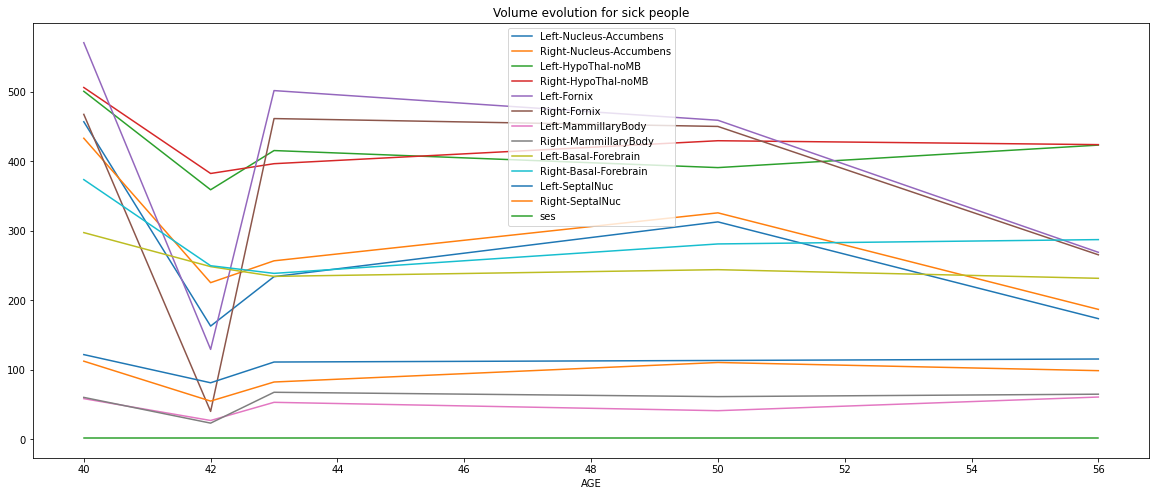

In [151]:
new_database.loc[
    (new_database['ses']==2) &
    (new_database['level_MOCA']>=1)
].groupby(by=['AGE']).mean().plot(use_index=True, y=new_database.columns[17:-1])
plt.title('Volume evolution for sick people')
plt.show()

#### Distinguishing men and women

In [221]:
zone = [
    'Left-Nucleus-Accumbens', 'Right-Nucleus-Accumbens', 'Left-HypoThal-noMB', 
    'Right-HypoThal-noMB', 'Left-Fornix', 'Right-Fornix', 
    'Left-MammillaryBody', 'Right-MammillaryBody', 'Left-Basal-Forebrain', 
    'Right-Basal-Forebrain', 'Left-SeptalNuc', 'Right-SeptalNuc'
]

Men analysis for a given computed mean brain zone.

/var/folders/x8/l4gyx97n3x1g2z5lr7ntrv740000gn/T/ipykernel_14128/632118311.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/x8/l4gyx97n3x1g2z5lr7ntrv740000gn/T/ipykernel_14128/632118311.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



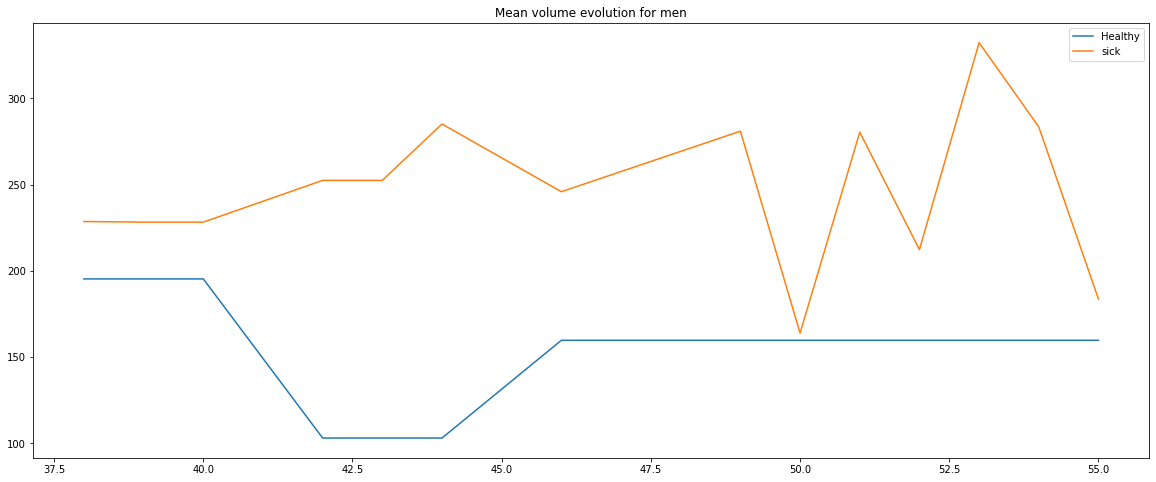

In [254]:
genre = 'M'

sick = new_database.loc[
    (new_database['GENRE']==genre) &
    (new_database['ses']==3) &
    (new_database['level_MOCA']==0)
]
sick['mean_zone'] = sick.loc[:, zone].copy().mean(axis=1).values
sick = sick.groupby(by=['AGE']).mean()

healthy = new_database.loc[
    (new_database['GENRE']==genre) &
    (new_database['ses']==3) &
    (new_database['level_MOCA']>0)
]
healthy['mean_zone'] = healthy.loc[:, zone].copy().mean(axis=1).values
healthy = healthy.groupby(by=['AGE']).mean()

index = sick.index.union(healthy.index)
healthy = healthy.reindex(index, method='nearest')
sick = sick.reindex(index, method='nearest')

plt.plot(index, healthy['mean_zone'], label='Healthy')
plt.plot(index, sick['mean_zone'], label='sick')
plt.legend()

plt.title('Mean volume evolution for men')
plt.show()

/var/folders/x8/l4gyx97n3x1g2z5lr7ntrv740000gn/T/ipykernel_14128/1517945345.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



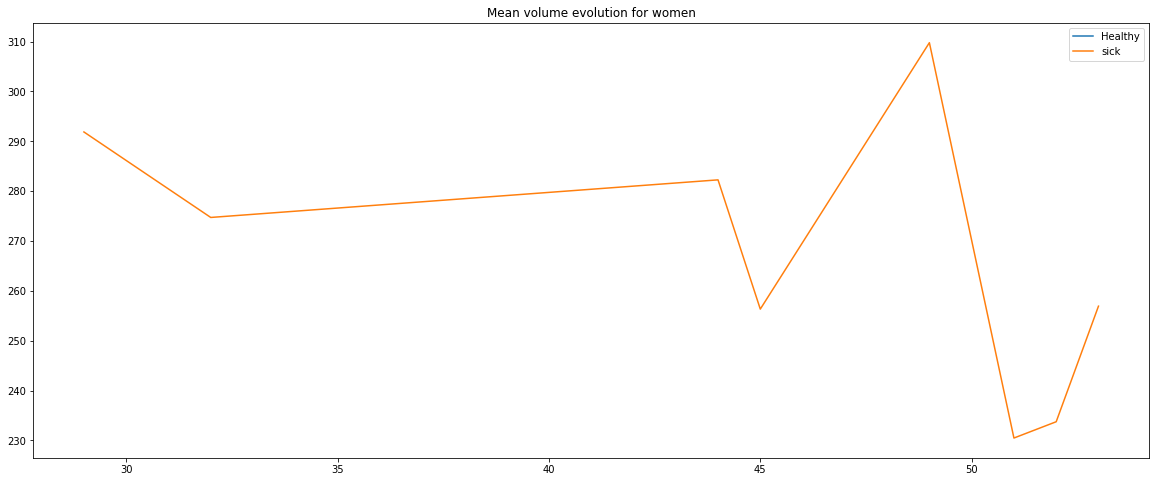

In [252]:
genre = 'F'

sick = new_database.loc[
    (new_database['GENRE']==genre) &
    (new_database['ses']==3) &
    (new_database['level_MOCA']==0)
]
sick['mean_zone'] = sick.loc[:, zone].copy().mean(axis=1).values
sick = sick.groupby(by=['AGE']).mean()

healthy = new_database.loc[
    (new_database['GENRE']==genre) &
    (new_database['ses']==3) &
    (new_database['level_MOCA']>0)
]
healthy['mean_zone'] = healthy.loc[:, zone].copy().mean(axis=1).values
healthy = healthy.groupby(by=['AGE']).mean()

index = sick.index.union(healthy.index)
healthy = healthy.reindex(index, method='nearest')
sick = sick.reindex(index, method='nearest')

plt.plot(index, healthy['mean_zone'], label='Healthy')
plt.plot(index, sick['mean_zone'], label='sick')
plt.legend()

plt.title('Mean volume evolution for women')
plt.show()